# Starbucks DCA

In [1]:
# Dollar-cost averaging into Starbucks

# Import Libraries

In [2]:
import datetime
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Set dates

# Set lookback range in years
y = 3

# Start date (y-years back)
start_date = str(datetime.date.today() - datetime.timedelta(days = y * 365))

# End date (today)
end_date = str(datetime.date.today() + datetime.timedelta(days = 1))

# Starbucks Data

In [4]:
# Get the data for Starbuks stock by specifying the stock ticker, start date, and end date 
df_sb = yf.download('SBUX', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Reset index after creating date column
df_sb = df_sb.reset_index()

In [6]:
# Just get keep date and adjusted close price columns
df_sb_ac = df_sb[['Date', 'Adj Close']]
df_sb_ac

,Date,Adj Close
0,2018-12-31,60.928455
1,2019-01-02,60.852772
2,2019-01-03,58.213158
3,2019-01-04,60.143200
4,2019-01-07,60.143200
...,...,...
751,2021-12-22,111.739998
752,2021-12-23,112.370003
753,2021-12-27,114.220001
754,2021-12-28,115.570000


C:\Users\mchin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


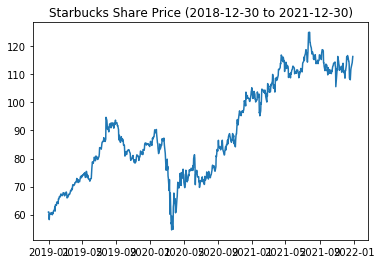

In [7]:
# Plot the close prices 
plt.plot(df_sb_ac['Date'], df_sb_ac['Adj Close']) 
plt.title('Starbucks Share Price (' + start_date + ' to ' + end_date + ')')
plt.show() 

In [8]:
# Dollar Cost Average $5 Every Day

# Set daily dollar cost average amount, this is how much is invested in each investing period
df_sb_ac['DCA'] = 5

# Calculate fractional shares that investment amount can purchase
df_sb_ac['DCA Shares'] = df_sb_ac['DCA']/df_sb_ac['Adj Close']

# Calculate Cost of Homemade Daily Coffee
# Starbucks ground coffee $15 / 28 ounce bag
# 2 tablespoons per cup of coffee
# 1 tablespoon approximately 0.5 ounces
# 1 ounce per cup --> 28 cups / bag
# $0.53 per cup --> round to $0.50 for neater numbers --> this is more on the liberal side
# quick google search gives cost of making coffee closer to $0.25 depending on where you live

df_sb_ac['Home Coffee'] = 0.5

# Pull out coffee of homemade coffee column as list
dca_home = df_sb_ac['Home Coffee']
dca_home_list = list(dca_home)

# Pull out DCA Shares column as list
dca_shares = df_sb_ac['DCA Shares']
dca_shares_list = list(dca_shares)

# Pull out DCA column as list
dca_invest = df_sb_ac['DCA']
dca_invest_list = list(dca_invest)

# Create empty variables for DCA for loop calculation

# Cost of making coffee at home
home_coffee = []

# Number of shares owned to date
tot_shares = []

# Amount invested to date
principal = []

# Create for loop to loop through each day that SBUX has traded and calculated cumulative total shares owned and principal
for i in range(len(dca_shares_list)):

    # First iteration, total shares is number of shares purchased by one DCA investment amount and principal is DCA investment amount
    if i == 0:
        home_coffee.append(dca_home_list[i])
        tot_shares.append(dca_shares_list[i])
        principal.append(dca_invest[i])
    
    # All other iterations, add on current iteration date's share amount and investment amount to previous iteration
    elif i > 0:
        home_coffee.append(dca_home_list[i] + home_coffee[i-1])
        tot_shares.append(dca_shares_list[i] + tot_shares[i-1])
        principal.append(dca_invest_list[i] + principal[i-1])

df_sb_ac['Total Home Coffee Cost'] = home_coffee
df_sb_ac['Total Shares'] = tot_shares
df_sb_ac['Principal'] = principal

# Calculate total portfolio balance based on that date's share price
df_sb_ac['Portfolio Balance'] = df_sb_ac['Total Shares'] * df_sb_ac['Adj Close']

# Calculate total gain from principal invested
df_sb_ac['Gain'] = round(df_sb_ac['Portfolio Balance'] - df_sb_ac['Principal'],4)

# Calculate total percent gain from principal invested
df_sb_ac['Gain %'] = round(df_sb_ac['Gain'] / df_sb_ac['Principal'] * 100, 2)

df_sb_ac

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Date,Adj Close,DCA,DCA Shares,Home Coffee,Total Home Coffee Cost,Total Shares,Principal,Portfolio Balance,Gain,Gain %
0,2018-12-31,60.928455,5,0.082063,0.5,0.5,0.082063,5,5.000000,0.0000,0.00
1,2019-01-02,60.852772,5,0.082166,0.5,1.0,0.164229,10,9.993789,-0.0062,-0.06
2,2019-01-03,58.213158,5,0.085891,0.5,1.5,0.250120,15,14.560288,-0.4397,-2.93
3,2019-01-04,60.143200,5,0.083135,0.5,2.0,0.333255,20,20.043031,0.0430,0.22
4,2019-01-07,60.143200,5,0.083135,0.5,2.5,0.416390,25,25.043031,0.0430,0.17
...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-22,111.739998,5,0.044747,0.5,376.0,43.533996,3760,4864.488586,1104.4886,29.37
752,2021-12-23,112.370003,5,0.044496,0.5,376.5,43.578492,3765,4896.915216,1131.9152,30.06
753,2021-12-27,114.220001,5,0.043775,0.5,377.0,43.622267,3770,4982.535359,1212.5354,32.16
754,2021-12-28,115.570000,5,0.043264,0.5,377.5,43.665531,3775,5046.425352,1271.4254,33.68


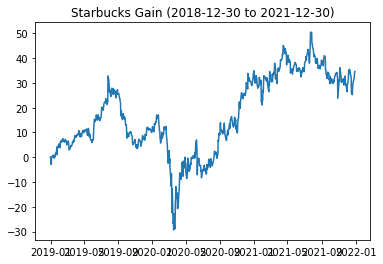

In [9]:
# Plot the gain %
plt.plot(df_sb_ac['Date'], df_sb_ac['Gain %']) 
plt.title('Starbucks Gain (' + start_date + ' to ' + end_date + ')')
plt.show() 

In [10]:
# Over 3 years
print('$', df_sb_ac['Principal'][df_sb_ac.index[-1]],' spent on buying coffee, but $', df_sb_ac['Total Home Coffee Cost'][df_sb_ac.index[-1]], ' if made at home')
print('If invested in SBUX, gain of $', df_sb_ac['Gain'][df_sb_ac.index[-1]], 'or ', df_sb_ac['Gain %'][df_sb_ac.index[-1]], '% gain')

$ 3780  spent on buying coffee, but $ 378.0  if made at home
If invested in SBUX, gain of $ 1306.7943 or  34.57 % gain


In [11]:
# Made coffee and invested in SBUX
# Many of us were working from home anyway, so we had to make our own coffee
# What if we spent the 50 cents to make coffee and used the remaining $2.50 to invest?

In [12]:
# Dollar Cost Average $4.5 Every Day
df_sb2_ac = df_sb[['Date', 'Adj Close']]

# Set daily dollar cost average amount, this is how much is invested in each investing period
df_sb2_ac['DCA'] = 4.5

# Calculate fractional shares that investment amount can purchase
df_sb2_ac['DCA Shares'] = df_sb2_ac['DCA']/df_sb2_ac['Adj Close']

# Calculate Cost of Homemade Daily Coffee
# Starbucks ground coffee $15 / 28 ounce bag
# 2 tablespoons per cup of coffee
# 1 tablespoon approximately 0.5 ounces
# 1 ounce per cup --> 28 cups / bag
# $0.53 per cup --> round to $0.50 for neater numbers --> this is more on the liberal side
# quick google search gives cost of making coffee closer to $0.25 depending on where you live

df_sb2_ac['Home Coffee'] = 0.5

# Pull out coffee of homemade coffee column as list
dca_home = df_sb2_ac['Home Coffee']
dca_home_list = list(dca_home)

# Pull out DCA Shares column as list
dca_shares = df_sb2_ac['DCA Shares']
dca_shares_list = list(dca_shares)

# Pull out DCA column as list
dca_invest = df_sb2_ac['DCA']
dca_invest_list = list(dca_invest)

# Create empty variables for DCA for loop calculation

# Cost of making coffee at home
home_coffee = []

# Number of shares owned to date
tot_shares = []

# Amount invested to date
principal = []

# Create for loop to loop through each day that SBUX has traded and calculated cumulative total shares owned and principal
for i in range(len(dca_shares_list)):

    # First iteration, total shares is number of shares purchased by one DCA investment amount and principal is DCA investment amount
    if i == 0:
        home_coffee.append(dca_home_list[i])
        tot_shares.append(dca_shares_list[i])
        principal.append(dca_invest[i])
    
    # All other iterations, add on current iteration date's share amount and investment amount to previous iteration
    elif i > 0:
        home_coffee.append(dca_home_list[i] + home_coffee[i-1])
        tot_shares.append(dca_shares_list[i] + tot_shares[i-1])
        principal.append(dca_invest_list[i] + principal[i-1])

df_sb2_ac['Total Home Coffee Cost'] = home_coffee
df_sb2_ac['Total Shares'] = tot_shares
df_sb2_ac['Principal'] = principal

# Calculate total portfolio balance based on that date's share price
df_sb2_ac['Portfolio Balance'] = df_sb2_ac['Total Shares'] * df_sb2_ac['Adj Close']

# Calculate total gain from principal invested
df_sb2_ac['Gain'] = round(df_sb2_ac['Portfolio Balance'] - df_sb2_ac['Principal'],4)

# Calculate total percent gain from principal invested
df_sb2_ac['Gain %'] = round(df_sb2_ac['Gain'] / df_sb2_ac['Principal'] * 100, 2)

df_sb2_ac

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,Date,Adj Close,DCA,DCA Shares,Home Coffee,Total Home Coffee Cost,Total Shares,Principal,Portfolio Balance,Gain,Gain %
0,2018-12-31,60.928455,4.5,0.073857,0.5,0.5,0.073857,4.5,4.500000,0.0000,0.00
1,2019-01-02,60.852772,4.5,0.073949,0.5,1.0,0.147806,9.0,8.994410,-0.0056,-0.06
2,2019-01-03,58.213158,4.5,0.077302,0.5,1.5,0.225108,13.5,13.104259,-0.3957,-2.93
3,2019-01-04,60.143200,4.5,0.074821,0.5,2.0,0.299930,18.0,18.038728,0.0387,0.22
4,2019-01-07,60.143200,4.5,0.074821,0.5,2.5,0.374751,22.5,22.538728,0.0387,0.17
...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-22,111.739998,4.5,0.040272,0.5,376.0,39.180596,3384.0,4378.039727,994.0397,29.37
752,2021-12-23,112.370003,4.5,0.040046,0.5,376.5,39.220642,3388.5,4407.223694,1018.7237,30.06
753,2021-12-27,114.220001,4.5,0.039398,0.5,377.0,39.260040,3393.0,4484.281823,1091.2818,32.16
754,2021-12-28,115.570000,4.5,0.038937,0.5,377.5,39.298977,3397.5,4541.782817,1144.2828,33.68


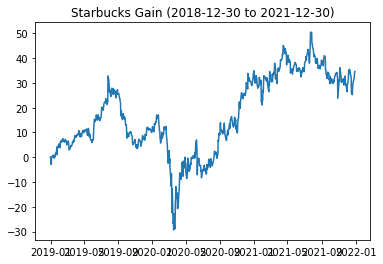

In [13]:
# Plot the close prices 
plt.plot(df_sb2_ac['Date'], df_sb2_ac['Gain %']) 
plt.title('Starbucks Gain (' + start_date + ' to ' + end_date + ')')
plt.show() 

In [14]:
# Over 3 years
print('$', df_sb2_ac['Principal'][df_sb2_ac.index[-1]],' spent on buying coffee, but $', df_sb2_ac['Total Home Coffee Cost'][df_sb2_ac.index[-1]], ' if made at home')
print('If invested in SBUX, gain of $', df_sb2_ac['Gain'][df_sb2_ac.index[-1]], 'or ', df_sb2_ac['Gain %'][df_sb2_ac.index[-1]], '% gain')

$ 3402.0  spent on buying coffee, but $ 378.0  if made at home
If invested in SBUX, gain of $ 1176.1149 or  34.57 % gain


# VOO Data

In [15]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
df_voo = yf.download('VOO', start_date, end_date) 

[*********************100%***********************]  1 of 1 completed


In [16]:
# Reset index after creating date column
df_voo = df_voo.reset_index()

In [17]:
df_voo_ac = df_voo[['Date', 'Adj Close']]
df_voo_ac

,Date,Adj Close
0,2018-12-31,218.073441
1,2019-01-02,218.244232
2,2019-01-03,213.034607
3,2019-01-04,220.066193
4,2019-01-07,221.717316
...,...,...
751,2021-12-22,429.989990
752,2021-12-23,432.640015
753,2021-12-27,438.809998
754,2021-12-28,438.480011


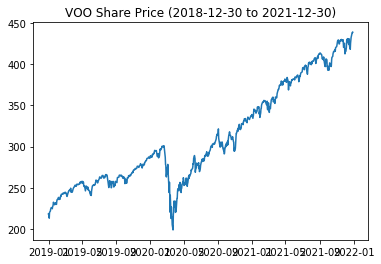

In [18]:
# Plot the close prices 
plt.plot(df_voo_ac['Date'], df_voo_ac['Adj Close'])
plt.title('VOO Share Price (' + start_date + ' to ' + end_date + ')')
plt.show() 

In [19]:
# Dollar Cost Average $5 Every Day

# Set daily dollar cost average amount, this is how much is invested in each investing period
df_voo_ac['DCA'] = 5

# Calculate fractional shares that investment amount can purchase
df_voo_ac['DCA Shares'] = df_voo_ac['DCA']/df_voo_ac['Adj Close']

# Calculate Cost of Homemade Daily Coffee
# Starbucks ground coffee $15 / 28 ounce bag
# 2 tablespoons per cup of coffee
# 1 tablespoon approximately 0.5 ounces
# 1 ounce per cup --> 28 cups / bag
# $0.53 per cup --> round to $0.50 for neater numbers --> this is more on the liberal side
# quick google search gives cost of making coffee closer to $0.25 depending on where you live
df_voo_ac['Home Coffee'] = 0.5

# Pull out coffee of homemade coffee column as list
dca_home = df_voo_ac['Home Coffee']
dca_home_list = list(dca_home)

# Pull out DCA Shares column as list
dca_shares = df_voo_ac['DCA Shares']
dca_shares_list = list(dca_shares)

# Pull out DCA column as list
dca_invest = df_voo_ac['DCA']
dca_invest_list = list(dca_invest)

# Create empty variables for DCA for loop calculation

# Cost of making coffee at home
home_coffee = []

# Number of shares owned to date
tot_shares = []

# Amount invested to date
principal = []

# Create for loop to loop through each day that SBUX has traded and calculated cumulative total shares owned and principal
for i in range(len(dca_shares_list)):

    # First iteration, total shares is number of shares purchased by one DCA investment amount and principal is DCA investment amount
    if i == 0:
        home_coffee.append(dca_home_list[i])
        tot_shares.append(dca_shares_list[i])
        principal.append(dca_invest[i])
    
    # All other iterations, add on current iteration date's share amount and investment amount to previous iteration
    elif i > 0:
        home_coffee.append(dca_home_list[i] + home_coffee[i-1])
        tot_shares.append(dca_shares_list[i] + tot_shares[i-1])
        principal.append(dca_invest_list[i] + principal[i-1])

df_voo_ac['Total Home Coffee Cost'] = home_coffee
df_voo_ac['Total Shares'] = tot_shares
df_voo_ac['Principal'] = principal

# Calculate total portfolio balance based on that date's share price
df_voo_ac['Portfolio Balance'] = df_voo_ac['Total Shares'] * df_voo_ac['Adj Close']

# Calculate total gain from principal invested
df_voo_ac['Gain'] = round(df_voo_ac['Portfolio Balance'] - df_voo_ac['Principal'],4)

# Calculate total percent gain from principal invested
df_voo_ac['Gain %'] = round(df_voo_ac['Gain'] / df_voo_ac['Principal'] * 100, 2)

df_voo_ac

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Date,Adj Close,DCA,DCA Shares,Home Coffee,Total Home Coffee Cost,Total Shares,Principal,Portfolio Balance,Gain,Gain %
0,2018-12-31,218.073441,5,0.022928,0.5,0.5,0.022928,5,5.000000,0.0000,0.00
1,2019-01-02,218.244232,5,0.022910,0.5,1.0,0.045838,10,10.003916,0.0039,0.04
2,2019-01-03,213.034607,5,0.023470,0.5,1.5,0.069309,15,14.765116,-0.2349,-1.57
3,2019-01-04,220.066193,5,0.022720,0.5,2.0,0.092029,20,20.252465,0.2525,1.26
4,2019-01-07,221.717316,5,0.022551,0.5,2.5,0.114580,25,25.404416,0.4044,1.62
...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-22,429.989990,5,0.011628,0.5,376.0,12.590111,3760,5413.621539,1653.6215,43.98
752,2021-12-23,432.640015,5,0.011557,0.5,376.5,12.601668,3765,5451.985640,1686.9856,44.81
753,2021-12-27,438.809998,5,0.011394,0.5,377.0,12.613062,3770,5534.737713,1764.7377,46.81
754,2021-12-28,438.480011,5,0.011403,0.5,377.5,12.624465,3775,5535.575572,1760.5756,46.64


In [20]:
# Over 3 years
print('$', df_voo_ac['Principal'][df_voo_ac.index[-1]],' spent on buying coffee, but $', df_voo_ac['Total Home Coffee Cost'][df_voo_ac.index[-1]], ' if made at home')
print('If invested in VOO, gain of $', df_voo_ac['Gain'][df_voo_ac.index[-1]], 'or ', df_voo_ac['Gain %'][df_voo_ac.index[-1]], '% gain')

$ 3780  spent on buying coffee, but $ 378.0  if made at home
If invested in VOO, gain of $ 1767.2665 or  46.75 % gain


In [21]:
# Made coffee and invested in VOO
# Many of us were working from home anyway, so we had to make our own coffee
# What if we spent the 50 cents to make coffee and used the remaining $2.50 to invest?

In [22]:
# Dollar Cost Average $4.5 Every Day
df_voo2_ac = df_voo[['Date', 'Adj Close']]

# Set daily dollar cost average amount, this is how much is invested in each investing period
df_voo2_ac['DCA'] = 4.5

# Calculate fractional shares that investment amount can purchase
df_voo2_ac['DCA Shares'] = df_voo2_ac['DCA']/df_voo2_ac['Adj Close']

# Calculate Cost of Homemade Daily Coffee
# Starbucks ground coffee $15 / 28 ounce bag
# 2 tablespoons per cup of coffee
# 1 tablespoon approximately 0.5 ounces
# 1 ounce per cup --> 28 cups / bag
# $0.53 per cup --> round to $0.50 for neater numbers --> this is more on the liberal side
# quick google search gives cost of making coffee closer to $0.25 depending on where you live
df_voo2_ac['Home Coffee'] = 0.5

# Pull out coffee of homemade coffee column as list
dca_home = df_voo2_ac['Home Coffee']
dca_home_list = list(dca_home)

# Pull out DCA Shares column as list
dca_shares = df_voo2_ac['DCA Shares']
dca_shares_list = list(dca_shares)

# Pull out DCA column as list
dca_invest = df_voo2_ac['DCA']
dca_invest_list = list(dca_invest)

# Create empty variables for DCA for loop calculation

# Cost of making coffee at home
home_coffee = []

# Number of shares owned to date
tot_shares = []

# Amount invested to date
principal = []

# Create for loop to loop through each day that SBUX has traded and calculated cumulative total shares owned and principal
for i in range(len(dca_shares_list)):

    # First iteration, total shares is number of shares purchased by one DCA investment amount and principal is DCA investment amount
    if i == 0:
        home_coffee.append(dca_home_list[i])
        tot_shares.append(dca_shares_list[i])
        principal.append(dca_invest[i])
    
    # All other iterations, add on current iteration date's share amount and investment amount to previous iteration
    elif i > 0:
        home_coffee.append(dca_home_list[i] + home_coffee[i-1])
        tot_shares.append(dca_shares_list[i] + tot_shares[i-1])
        principal.append(dca_invest_list[i] + principal[i-1])

df_voo2_ac['Total Home Coffee Cost'] = home_coffee
df_voo2_ac['Total Shares'] = tot_shares
df_voo2_ac['Principal'] = principal

# Calculate total portfolio balance based on that date's share price
df_voo2_ac['Portfolio Balance'] = df_voo2_ac['Total Shares'] * df_voo2_ac['Adj Close']

# Calculate total gain from principal invested
df_voo2_ac['Gain'] = round(df_voo2_ac['Portfolio Balance'] - df_voo2_ac['Principal'],4)

# Calculate total percent gain from principal invested
df_voo2_ac['Gain %'] = round(df_voo2_ac['Gain'] / df_voo2_ac['Principal'] * 100, 2)

df_voo2_ac

C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mchin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,Date,Adj Close,DCA,DCA Shares,Home Coffee,Total Home Coffee Cost,Total Shares,Principal,Portfolio Balance,Gain,Gain %
0,2018-12-31,218.073441,4.5,0.020635,0.5,0.5,0.020635,4.5,4.500000,0.0000,0.00
1,2019-01-02,218.244232,4.5,0.020619,0.5,1.0,0.041254,9.0,9.003524,0.0035,0.04
2,2019-01-03,213.034607,4.5,0.021123,0.5,1.5,0.062378,13.5,13.288605,-0.2114,-1.57
3,2019-01-04,220.066193,4.5,0.020448,0.5,2.0,0.082826,18.0,18.227219,0.2272,1.26
4,2019-01-07,221.717316,4.5,0.020296,0.5,2.5,0.103122,22.5,22.863975,0.3640,1.62
...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-22,429.989990,4.5,0.010465,0.5,376.0,11.331100,3384.0,4872.259385,1488.2594,43.98
752,2021-12-23,432.640015,4.5,0.010401,0.5,376.5,11.341501,3388.5,4906.787076,1518.2871,44.81
753,2021-12-27,438.809998,4.5,0.010255,0.5,377.0,11.351756,3393.0,4981.263942,1588.2639,46.81
754,2021-12-28,438.480011,4.5,0.010263,0.5,377.5,11.362019,3397.5,4982.018015,1584.5180,46.64


In [23]:
# Over 3 years
print('$', df_voo2_ac['Principal'][df_voo2_ac.index[-1]],' spent on buying coffee, but $', df_voo2_ac['Total Home Coffee Cost'][df_voo2_ac.index[-1]], ' if made at home')
print('If invested in VOO, gain of $', df_voo2_ac['Gain'][df_voo2_ac.index[-1]], 'or ', df_voo2_ac['Gain %'][df_voo2_ac.index[-1]], '% gain')

$ 3402.0  spent on buying coffee, but $ 378.0  if made at home
If invested in VOO, gain of $ 1590.5399 or  46.75 % gain


# Summary

In [24]:
summary_list = {'Model': ['Buy Coffee', 'Make Coffee', 'SBUX', 'SBUX and Make Coffee', 'VOO', 'VOO and Make Coffee'],
                'Principal/Cost': [df_sb_ac['Principal'][df_sb_ac.index[-1]], df_sb_ac['Total Home Coffee Cost'][df_sb_ac.index[-1]], df_sb_ac['Principal'][df_sb_ac.index[-1]], df_sb_ac['Principal'][df_sb_ac.index[-1]], df_sb_ac['Principal'][df_sb_ac.index[-1]], df_sb_ac['Principal'][df_sb_ac.index[-1]]],
                'Balance': [-df_sb_ac['Principal'][df_sb_ac.index[-1]], -df_sb_ac['Total Home Coffee Cost'][df_sb_ac.index[-1]], df_sb_ac['Portfolio Balance'][df_sb_ac.index[-1]], df_sb2_ac['Portfolio Balance'][df_sb2_ac.index[-1]], df_voo_ac['Portfolio Balance'][df_voo_ac.index[-1]], df_voo2_ac['Portfolio Balance'][df_voo2_ac.index[-1]]],
                'Gain': [-df_sb_ac['Principal'][df_sb_ac.index[-1]], -df_sb_ac['Total Home Coffee Cost'][df_sb_ac.index[-1]], df_sb_ac['Gain'][df_sb_ac.index[-1]], df_sb2_ac['Gain'][df_sb2_ac.index[-1]], df_voo_ac['Gain'][df_voo_ac.index[-1]], df_voo2_ac['Gain'][df_voo2_ac.index[-1]]], 
                'Gain %': [-100, -100, df_sb_ac['Gain %'][df_sb_ac.index[-1]], df_sb2_ac['Gain %'][df_sb2_ac.index[-1]], df_voo_ac['Gain %'][df_voo_ac.index[-1]], df_voo2_ac['Gain %'][df_voo2_ac.index[-1]]]}

In [25]:
df_summary = pd.DataFrame(summary_list)
df_summary

,Plan,Principal/Cost,Balance,Gain,Gain %
0,Buy Coffee,3780.0,-3780.000000,-3780.0000,-100.00
1,Make Coffee,378.0,-378.000000,-378.0000,-100.00
2,SBUX,3780.0,5086.794325,1306.7943,34.57
3,SBUX and Make Coffee,3780.0,4578.114893,1176.1149,34.57
4,VOO,3780.0,5547.266523,1767.2665,46.75
5,VOO and Make Coffee,3780.0,4992.539871,1590.5399,46.75
